# Transcript from Lecture, February 23, 2023

In [1]:
import sys

########################################
# Change the string in the line below! #
########################################
sys.path.append("/Users/gilbert/Documents/CS111-2023-winter/Python") 

import os
import time
import math
import numpy as np
import numpy.linalg as npla
import scipy
from scipy import linalg as spla
import scipy.sparse
import scipy.sparse.linalg
from scipy import integrate
import networkx as nx
import json
import cs111

##########################################################
# If this import for matplotlib doesn't work, try saying #
#   conda install -c conda-forge ipympl                  #
# at a shell prompt on your computer                     #
##########################################################
import matplotlib
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d

np.set_printoptions(precision = 4)

# Round-off error: Errors due to rounding in floating-point

## Cancellation when subtracting almost equal numbers

In [2]:
1/3

0.3333333333333333

In [3]:
a = 1
a + 1/3 - a

0.33333333333333326

In [4]:
a = 100
a + 1/3 - a

0.3333333333333286

In [5]:
a = 1000000
a + 1/3 - a

0.33333333337213844

In [6]:
a = 10**10
a + 1/3 - a

0.33333396911621094

In [7]:
a = 10**15
a + 1/3 - a

0.375

In [8]:
a = 10**16
a + 1/3 - a

0.0

## Floating-point addition is not associative!

In [9]:
a = -1/2
b = 1/2
c = 2 ** -54

print("(a + b) + c:", (a + b) + c)
print()
print("a + (b + c):", a + (b + c))



(a + b) + c: 5.551115123125783e-17

a + (b + c): 0.0


In [10]:
cs111.print_float64((a + b) + c)
cs111.print_float64(a + (b + c))

input     : 5.551115123125783e-17
as float64: 5.5511151231257827e-17
as hex    : 3c90000000000000
sign      : 0 means +
exponent  : 3c9 means 969 - 1023 = -54
mantissa  : 1.0000000000000000000000000000000000000000000000000000

input     : 0.0
as float64: 0.0000000000000000e+00
as hex    : 0000000000000000
sign      : 0 means +
exponent  : 000 means zero or denormal



## Catastrophic cancellation in action: computing $(x-1)^7$

In [12]:
# A simple function of a real number x
def f1(x):
    return (x-1)**7

# Same function, but multiplied out and written as a polynomial in x
def f2(x):
    return x**7 - 7*x**6 + 21*x**5 - 35*x**4 + 35*x**3 - 21*x**2 + 7*x - 1


In [13]:
x = 1
print('x:', x, '; (x-1)**7:', f1(x), ';  polynomial:', f2(x))

x: 1 ; (x-1)**7: 0 ;  polynomial: 0


In [14]:
x = 1.1
print('x:', x, '; (x-1)**7:', f1(x), ';  polynomial:', f2(x))

x: 1.1 ; (x-1)**7: 1.0000000000000062e-07 ;  polynomial: 1.0000000649768026e-07


In [15]:
x = 1.01
print('x:', x, '; (x-1)**7:', f1(x), ';  polynomial:', f2(x))

x: 1.01 ; (x-1)**7: 1.0000000000000062e-14 ;  polynomial: 1.4210854715202004e-14


In [16]:
x = 1.001
print('x:', x, '; (x-1)**7:', f1(x), ';  polynomial:', f2(x))

x: 1.001 ; (x-1)**7: 9.99999999999229e-22 ;  polynomial: 8.881784197001252e-15


/var/folders/lz/5_q87gdn7zq7nsmnvpvc2ydw0000gn/T/ipykernel_76576/3095386070.py:21: RuntimeWarning: invalid value encountered in true_divide
  plt.semilogy(xvals, np.abs((y1-y2)/y1))


Text(0.5, 1.0, 'relative error in polynomial f2(x)')

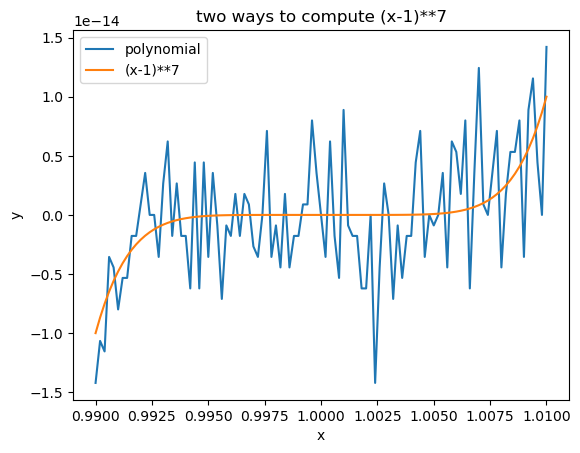

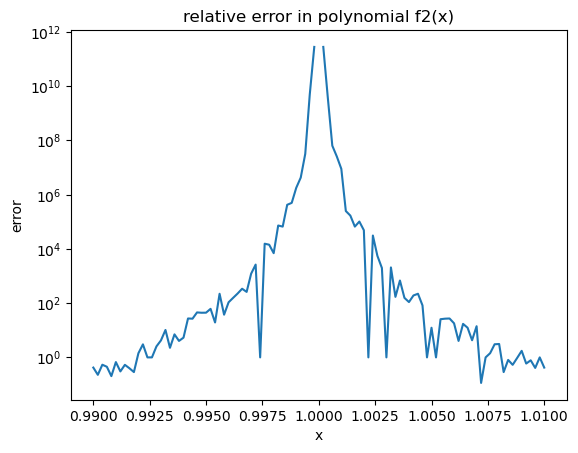

In [17]:
xvals = np.linspace(.99, 1.01, 101)

y1 = []
y2 = []
for x in xvals:
    y1.append(f1(x))
    y2.append(f2(x))
y1 = np.array(y1)
y2 = np.array(y2)

%matplotlib inline
plt.figure()
plt.plot(xvals, y2, label = 'polynomial')
plt.plot(xvals, y1, label = '(x-1)**7')
plt.xlabel('x')
plt.ylabel('y')
plt.title('two ways to compute (x-1)**7')
plt.legend()

plt.figure()
plt.semilogy(xvals, np.abs((y1-y2)/y1))
plt.xlabel('x')
plt.ylabel('error')
plt.title('relative error in polynomial f2(x)')
